### Exercise 5: Clustering

Please write your name and student id  Mariia Chernova 1908135

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from scipy.stats import norm
import math
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Read in the dataset in exercise05.csv

In [14]:
data = np.genfromtxt("./exercise05.csv", delimiter=",", skip_header=1)
# YOUR CODE HERE
# raise NotImplementedError()

In [15]:
assert(data.shape == (51,5) or data.shape == (50,5))

In [4]:
# assign to x the data excluding class info (last column) that gets assigned to y
# scale x data (assign scaler object to variable scaler) and assign to scaled_x
x = data[:,:4]
y = data[:,4]
scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)
# raise NotImplementedError()

In [5]:
assert(x.shape == (51,4))
assert(y.shape[0] == 51)

Perform PCA for scaled_x with a n_components parameter that lets you plot the explained variance for components.

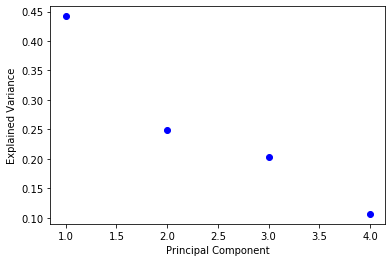

In [6]:
# YOUR CODE HERE
# raise NotImplementedError()
n_components = scaled_x.shape[1]
pca = PCA(n_components = n_components)
pca.fit(scaled_x)

plt.plot(range(1,scaled_x.shape[1]+1), pca.explained_variance_ratio_, "bo")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.show()

In [7]:
np.testing.assert_almost_equal(np.sum(pca.explained_variance_ratio_), 1.0, decimal=2)
np.testing.assert_almost_equal(np.sum(pca.explained_variance_ratio_[0:2]), 0.69, decimal=2)

Despite the fact that we could probably drop 1-2 dimensions, we don't do it this time; we'd like to maintain interpretability of the results (note that pca maps the features to new space where coordinates are linear combinations of the original ones - it can be hard to understand). The mapping is available in attribute components_, take a look at that if you are interested.


#### KMeans clustering

Let's cluster the data with KMeans.

In [28]:
# YOUR CODE HERE
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(scaled_x)

In [29]:
print(np.mean(scaler.inverse_transform(scaled_x[kmeans.labels_ == 0]),axis=0))
print(np.mean(scaler.inverse_transform(scaled_x[kmeans.labels_ == 1]),axis=0))

[2680.45454545  248.40909091  158.68181818   69.68181818]
[3097.82758621  154.10344828  174.82758621   78.51724138]


In [30]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y, kmeans.labels_)

array([[22,  4],
       [ 0, 25]])

In [31]:
# 3. Compare the averages from clustered data with averages calculated from real sample classes.
print("Female class")
print("# Real label:    ", end = '')
print(np.mean(x[y == 0],0))
print("# K-means label: ", end = '')
print(np.mean(x[kmeans.labels_ == 0],0))
print("Male class")
print("# Clustered data")
print("# Real label:    ", end = '')
print(np.mean(x[y == 1],0))
print("# K-means label: ", end = '')
print(np.mean(x[kmeans.labels_ == 1],0))

Female class
# Real label:    [2799.19230769  239.69230769  160.26923077   70.38461538]
# K-means label: [2680.45454545  248.40909091  158.68181818   69.68181818]
Male class
# Clustered data
# Real label:    [3041.12  148.08  175.76   79.2 ]
# K-means label: [3097.82758621  154.10344828  174.82758621   78.51724138]


#### Looking at the results

Please answer in the cell below.

1. What is the purpose of scaler.inverse_transform() call? Could you avoid it?
2. Which line represents cluster of females? Does it match the label (0 / 1)? Should it match? Why / why not?
3. Compare the averages from clustered data with averages calculated from real sample classes. Any noticable differences?

1. scaler.inverse_transform() scales back to original representation, i.e. features' means and variances get original values. If we want to know the coordinates of cluster centers in the original space, then we need to use this method.
2. In accordance with the confusion matrix above, the first cluster (kmeans.labels_ == 0) contains only females (y == 0). The second cluster (kmeans.labels_ == 1) contains mainly males (y == 1). So, first line (kmeans.labels_ == 0) represents females, which match label 0 (y == 0). Matching is not necessary as long as k means algorithm randomly assigns cluster labels.
3. Average values of salary, housecare time, height and weight over classes defined by true labels and k-means labels are rather close to each other. This is due to a significant overlap between true and k-means cluster labels.

Visualize kmeans results by looking at salary/housecare time and height/weight plots.

Which pair in your view gives a better and more truthful separation for the two classes? Please answer in the last cell.

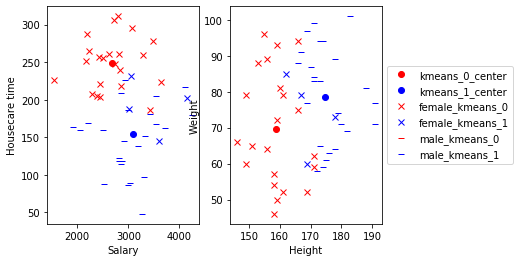

In [32]:
fig, ax = plt.subplots(1,2)
axis_names = ("Salary", "Housecare time", "Height", "Weight")
for (f1, f2, ax_id) in ((0, 1, 0), (2, 3, 1)):
    ox = x[:, f1]
    oy = x[:, f2]

    inverse_cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    ox_clucter = inverse_cluster_centers[:, f1]
    oy_clucter = inverse_cluster_centers[:, f2]

    # plot cluster centers
    ax[ax_id].plot(ox_clucter[0], oy_clucter[0], 'ro')
    ax[ax_id].plot(ox_clucter[1], oy_clucter[1], 'bo')
    
    # plot female, k-means label == 0
    idx = (y == 0) & (kmeans.labels_ == 0)
    ax[ax_id].plot(ox[idx], oy[idx], 'rx')
    
    # plot female, k-means label == 1
    idx = (y == 0) & (kmeans.labels_ == 1)
    ax[ax_id].plot(ox[idx], oy[idx], 'bx')
    
    # plot male, k-means label == 0
    idx = (y == 1) & (kmeans.labels_ == 0)
    ax[ax_id].plot(ox[idx], oy[idx], 'r_')
    
    # plot male, k-means label == 1
    idx = (y == 1) & (kmeans.labels_ == 1)
    ax[ax_id].plot(ox[idx], oy[idx], 'b_')
        
    # label axes
    ax[ax_id].set_xlabel(axis_names[f1])
    ax[ax_id].set_ylabel(axis_names[f2])

plt.legend(["kmeans_0_center", "kmeans_1_center", "female_kmeans_0",
            "female_kmeans_1", "male_kmeans_0", "male_kmeans_1"],
           loc='center left', bbox_to_anchor=(1, 0.5))
# raise NotImplementedError()

1.1 KMeans clustering
Q: Which pair in your view gives a better and more truthful separation for the two classes?
A: Simply looking at the plots, it is quite hard to say which pair of features gives a better separation between male and female classes. A more detailed investigation is needed.
Salary and weight seem to be quite uninformative for the classification task, because female and male labels are higly mixed in these dimensions. On the other side, weight and housecase time are more descriptive features than salary and weight. I would say that female and male classes are less mixed, thus, have better separation, in the dimension of height and weight

### GMM

Perform soft (Gaussian) clustering of the data. Compare the per class cluster means with means from sample data.

In [35]:
# YOUR CODE HERE
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(x)

# Compare the per class cluster means with means from sample data
print("Female class")
print("# Real label: ", end = '')
print(np.mean(x[y == 0],0))
print("# GMM:        ", end = '')
print(gmm.means_[1, :])
print("Male class")
print("# Clustered data")
print("# Real label: ", end = '')
print(np.mean(x[y == 1],0))
print("# GMM:        ", end = '')
print(gmm.means_[0, :])

Female class
# Real label: [2799.19230769  239.69230769  160.26923077   70.38461538]
# GMM:        [2401.34915982  241.6585062   161.24387875   62.59465662]
Male class
# Clustered data
# Real label: [3041.12  148.08  175.76   79.2 ]
# GMM:        [3147.6936517   173.91661237  170.80936708   80.09762199]
